In [2]:
import numpy as np 
PATH = 'results/release/semseg/test_final/'
semseg = np.load(f'{PATH}sample1.npz')['semseg']
semseg.shape

(208, 208, 80)

In [3]:
for i in range(208):
    for j in range(208):
        for k in range(80):
            if semseg[i, j, k] == -1:
                print(semseg[i, j, k])


[[1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2]]


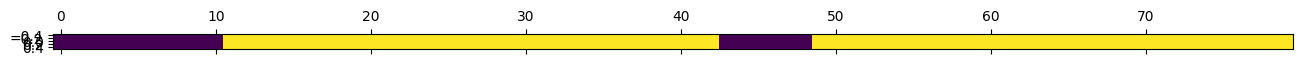

In [4]:
from matplotlib import pyplot as plt
import cv2
plt.matshow(semseg[0,0:1,:])
print(semseg[0,0:1,:])

In [5]:
tsdf = np.load(f'{PATH}sample1.npz')['tsdf']
for i in range(208):
    for j in range(208):
        for k in range(80):
            if tsdf[i, j, k] == 1:
                print(tsdf[i, j, k])

In [6]:
print(semseg.shape)

(208, 208, 80)


In [7]:
x = np.arange(0,208)
y = np.arange(0,208)
z = np.arange(0,80)

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

print(X.shape)

#Filter classes here and plot them in 3D


(208, 208, 80)


In [11]:
import trimesh
from trimesh.exchange.ply import parse_header, ply_binary
PATH = 'results/release/semseg/test_final/sample.ply'
with open(PATH, 'rb') as f:
    elements, is_ascii, image_name = parse_header(f)
    ply_binary(elements, f)
vertex_labels = elements['vertex']['data']['semseg']
vertex= elements['vertex']['data']
#print(vertex[0][0])

coord_wall = []
coord_floor = []
z_f = []
z_w = []
for v in vertex:
    if v[-1] == 1:
        x = v[0]
        y = v[1]
        z = v[2]
        z_w.append(v[2])
        coord_wall.append((x, y, z))
    elif v[-1] == 2:
        #print(v)
        x = v[0]
        y = v[1]
        z = v[2]
        z_f.append(v[2])
        coord_floor.append((x, y, z))
    elif v[-3] == 0 and v[-5]== 0 and v[-4]==0:
        print(v)
print(elements['vertex'])
print(np.max(z_f), np.min(z_f))
print(np.min(z_f))
print(np.max(z_w))
print(max(coord_floor))
# print(vertex)

{'length': 123453, 'properties': OrderedDict([('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', '<u1'), ('green', '<u1'), ('blue', '<u1'), ('alpha', '<u1'), ('semseg', '<i8')]), 'data': array([(0.11866904, 3.9199998, 1.78     , 174, 199, 232, 255, 1),
       (0.12      , 3.9199998, 1.7694876, 174, 199, 232, 255, 1),
       (0.12      , 3.9163966, 1.78     , 174, 199, 232, 255, 1), ...,
       (8.28      , 6.4541674, 1.8599999, 174, 199, 232, 255, 1),
       (8.28      , 6.446529 , 1.8999999, 174, 199, 232, 255, 1),
       (8.28      , 6.44072  , 1.94     , 174, 199, 232, 255, 1)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1'), ('alpha', 'u1'), ('semseg', '<i8')])}
0.6999999 0.2264778
0.2264778
2.6599998
(8.28, 6.2000585, 0.33999997)


In [121]:
PATH = 'results/release/semseg/test_final/'
origin = np.load(f'{PATH}sample1.npz')['origin']
print(origin)

[[ 0.   0.  -0.5]]


1